In [1]:
import requests
from requests import Response
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
response = requests.get(url)
print(response.text)

<!DOCTYPE html>
<html lang="zh-TW" class="no-js">
<head>
    <meta charset="utf-8" />
    <title>臺灣銀行牌告匯率</title>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="description" content="臺灣銀行匯率利率黃金牌價查詢">
    <meta name="keywords" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">
    <meta name="format-detection" content="telephone=no">
    <meta property="og:image" content="https://www.bot.com.tw/assets/images/bot-og-image_480x480.png">
        <meta name="robots" content="index,follow" />

    <link rel="icon" type="image/x-icon" href="/favicon.ico">
    <link rel="stylesheet" href="/Content/css/font-awesome.min.css">






    <link rel="stylesheet" href="/Content/css/jquery-ui.min.css">
    <link rel="stylesheet" href="/Content/main-3.8.0.css">
    <style nonce="p/jucBmpJeNBkuFa7JLfUvJy8GoysYQY7YXhHxFICGw=">
    h1.hero__header { font-size:1.5625rem }
    
    
    .bank {display:none}
    </style>

    <nos

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table', {'title': '牌告匯率'})

# 印出表格內容
#print(rate_table)

# 取得所有幣別和現金匯率資料
currency_rows = rate_table.tbody.find_all('tr')  # 跳過表頭行
#print(currency_rows)

for row in currency_rows:
    #print(row)
    print(row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip())
    # 取得幣別名稱 (移除多餘空白)
    # currency = row.find('div', class_='visible-phone').text.strip()
    
    # # 取得現金買入匯率
    # cash_buy = row.find_all('td')[1].text.strip()
    # # 取得現金賣出匯率
    # cash_sell = row.find_all('td')[2].text.strip()
    
    # # 轉換匯率值
    # cash_buy = round(float(cash_buy), 2) if cash_buy else None
    # cash_sell = round(float(cash_sell), 2) if cash_sell else None
    
    # print(f"幣別: {currency}")
    # print(f"現金買入: {cash_buy}")
    # print(f"現金賣出: {cash_sell}")
    # print("-" * 30)

美金 (USD)
港幣 (HKD)
英鎊 (GBP)
澳幣 (AUD)
加拿大幣 (CAD)
新加坡幣 (SGD)
瑞士法郎 (CHF)
日圓 (JPY)
南非幣 (ZAR)
瑞典幣 (SEK)
紐元 (NZD)
泰幣 (THB)
菲國比索 (PHP)
印尼幣 (IDR)
歐元 (EUR)
韓元 (KRW)
越南盾 (VND)
馬來幣 (MYR)
人民幣 (CNY)


In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table', {'title': '牌告匯率'})

# 取得所有幣別和現金匯率資料
currency_rows = rate_table.tbody.find_all('tr')  # 跳過表頭行 #Find_all 只能取得一個資訊
#print(currency_rows)

for row in currency_rows: #要再用for in一個一個抓要的資料
    # 取行中的幣別資料
    currency = row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip()

    # 取得即期買入匯率
    currency_get = row.find("td", attrs={"data-table": "本行現金買入"}).text.strip()

    # 取得即期賣出匯率
    currency_send = row.find("td", attrs={"data-table": "本行現金賣出"}).text.strip()
    print(f"幣別: {currency}, 現金買入: {currency_get}, 現金賣出: {currency_send}")
    print("==========")

幣別: 美金 (USD), 現金買入: 32.345, 現金賣出: 33.015
幣別: 港幣 (HKD), 現金買入: 4.058, 現金賣出: 4.262
幣別: 英鎊 (GBP), 現金買入: 40.23, 現金賣出: 42.35
幣別: 澳幣 (AUD), 現金買入: 20.49, 現金賣出: 21.27
幣別: 加拿大幣 (CAD), 現金買入: 22.57, 現金賣出: 23.48
幣別: 新加坡幣 (SGD), 現金買入: 23.92, 現金賣出: 24.83
幣別: 瑞士法郎 (CHF), 現金買入: 35.66, 現金賣出: 36.86
幣別: 日圓 (JPY), 現金買入: 0.2101, 現金賣出: 0.2229
幣別: 南非幣 (ZAR), 現金買入: -, 現金賣出: -
幣別: 瑞典幣 (SEK), 現金買入: -, 現金賣出: -
幣別: 紐元 (NZD), 現金買入: 18.36, 現金賣出: 19.21
幣別: 泰幣 (THB), 現金買入: 0.8474, 現金賣出: 1.0374
幣別: 菲國比索 (PHP), 現金買入: 0.5, 現金賣出: 0.632
幣別: 印尼幣 (IDR), 現金買入: 0.00168, 現金賣出: 0.00238
幣別: 歐元 (EUR), 現金買入: 33.48, 現金賣出: 34.82
幣別: 韓元 (KRW), 現金買入: 0.0211, 現金賣出: 0.025
幣別: 越南盾 (VND), 現金買入: 0.00104, 現金賣出: 0.00145
幣別: 馬來幣 (MYR), 現金買入: 6.387, 現金賣出: 7.912
幣別: 人民幣 (CNY), 現金買入: 4.421, 現金賣出: 4.583


In [8]:
from bs4 import BeautifulSoup
from pprint import pprint
soup = BeautifulSoup(response.text, 'html.parser')

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table', {'title': '牌告匯率'})

# 取得所有幣別和現金匯率資料
currency_rows = rate_table.tbody.find_all('tr') 

rates:list[dict] = []

for row in currency_rows:
    currency_dict = {}
    # 取行中的幣別資料
    currency = row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip()
    currency_dict["幣別"] = currency

    # 取得即期買入匯率
    currency_get = row.find("td", attrs={"data-table": "本行即期買入"}).text.strip()
    currency_dict["即期買入"] = currency_get

    # 取得即期賣出匯率
    currency_send = row.find("td", attrs={"data-table": "本行即期賣出"}).text.strip()
    currency_dict["即期賣出"] = currency_send

    #print(f"幣別: {currency}, 即期買入: {currency_get}, 即期賣出: {currency_send}")
    #print("-" * 20)
    rates.append(currency_dict)

pprint(rates)

[{'即期買入': '32.67', '即期賣出': '32.82', '幣別': '美金 (USD)'},
 {'即期買入': '4.179', '即期賣出': '4.249', '幣別': '港幣 (HKD)'},
 {'即期買入': '41.125', '即期賣出': '41.755', '幣別': '英鎊 (GBP)'},
 {'即期買入': '20.705', '即期賣出': '21.05', '幣別': '澳幣 (AUD)'},
 {'即期買入': '22.9', '即期賣出': '23.23', '幣別': '加拿大幣 (CAD)'},
 {'即期買入': '24.39', '即期賣出': '24.61', '幣別': '新加坡幣 (SGD)'},
 {'即期買入': '36.27', '即期賣出': '36.66', '幣別': '瑞士法郎 (CHF)'},
 {'即期買入': '0.2169', '即期賣出': '0.2219', '幣別': '日圓 (JPY)'},
 {'即期買入': '1.744', '即期賣出': '1.834', '幣別': '南非幣 (ZAR)'},
 {'即期買入': '3.02', '即期賣出': '3.14', '幣別': '瑞典幣 (SEK)'},
 {'即期買入': '18.69', '即期賣出': '18.99', '幣別': '紐元 (NZD)'},
 {'即期買入': '0.9578', '即期賣出': '1.0038', '幣別': '泰幣 (THB)'},
 {'即期買入': '-', '即期賣出': '-', '幣別': '菲國比索 (PHP)'},
 {'即期買入': '-', '即期賣出': '-', '幣別': '印尼幣 (IDR)'},
 {'即期買入': '33.995', '即期賣出': '34.595', '幣別': '歐元 (EUR)'},
 {'即期買入': '-', '即期賣出': '-', '幣別': '韓元 (KRW)'},
 {'即期買入': '-', '即期賣出': '-', '幣別': '越南盾 (VND)'},
 {'即期買入': '-', '即期賣出': '-', '幣別': '馬來幣 (MYR)'},
 {'即期買入': '4.488', '即期賣出': '4.5

In [10]:
def filter_func(item:dict)->bool:
    if item["即期買入"] == "-":
        return False
    else:
        return True
    

filtered_rates = list(filter(filter_func,rates))
filtered_rates

[{'幣別': '美金 (USD)', '即期買入': '32.67', '即期賣出': '32.82'},
 {'幣別': '港幣 (HKD)', '即期買入': '4.179', '即期賣出': '4.249'},
 {'幣別': '英鎊 (GBP)', '即期買入': '41.125', '即期賣出': '41.755'},
 {'幣別': '澳幣 (AUD)', '即期買入': '20.705', '即期賣出': '21.05'},
 {'幣別': '加拿大幣 (CAD)', '即期買入': '22.9', '即期賣出': '23.23'},
 {'幣別': '新加坡幣 (SGD)', '即期買入': '24.39', '即期賣出': '24.61'},
 {'幣別': '瑞士法郎 (CHF)', '即期買入': '36.27', '即期賣出': '36.66'},
 {'幣別': '日圓 (JPY)', '即期買入': '0.2169', '即期賣出': '0.2219'},
 {'幣別': '南非幣 (ZAR)', '即期買入': '1.744', '即期賣出': '1.834'},
 {'幣別': '瑞典幣 (SEK)', '即期買入': '3.02', '即期賣出': '3.14'},
 {'幣別': '紐元 (NZD)', '即期買入': '18.69', '即期賣出': '18.99'},
 {'幣別': '泰幣 (THB)', '即期買入': '0.9578', '即期賣出': '1.0038'},
 {'幣別': '歐元 (EUR)', '即期買入': '33.995', '即期賣出': '34.595'},
 {'幣別': '人民幣 (CNY)', '即期買入': '4.488', '即期賣出': '4.548'}]

In [13]:
import pandas as pd
df = pd.DataFrame(filtered_rates)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
幣別,美金 (USD),港幣 (HKD),英鎊 (GBP),澳幣 (AUD),加拿大幣 (CAD),新加坡幣 (SGD),瑞士法郎 (CHF),日圓 (JPY),南非幣 (ZAR),瑞典幣 (SEK),紐元 (NZD),泰幣 (THB),歐元 (EUR),人民幣 (CNY)
即期買入,32.67,4.179,41.125,20.705,22.9,24.39,36.27,0.2169,1.744,3.02,18.69,0.9578,33.995,4.488
即期賣出,32.82,4.249,41.755,21.05,23.23,24.61,36.66,0.2219,1.834,3.14,18.99,1.0038,34.595,4.548


In [14]:
def map_func(item:dict)->dict:
    item["即期買入"] = float(item["即期買入"])
    item["即期賣出"] = float(item["即期賣出"])
    return item

cleared_list= list(map(map_func,filtered_rates))
cleared_list

[{'幣別': '美金 (USD)', '即期買入': 32.67, '即期賣出': 32.82},
 {'幣別': '港幣 (HKD)', '即期買入': 4.179, '即期賣出': 4.249},
 {'幣別': '英鎊 (GBP)', '即期買入': 41.125, '即期賣出': 41.755},
 {'幣別': '澳幣 (AUD)', '即期買入': 20.705, '即期賣出': 21.05},
 {'幣別': '加拿大幣 (CAD)', '即期買入': 22.9, '即期賣出': 23.23},
 {'幣別': '新加坡幣 (SGD)', '即期買入': 24.39, '即期賣出': 24.61},
 {'幣別': '瑞士法郎 (CHF)', '即期買入': 36.27, '即期賣出': 36.66},
 {'幣別': '日圓 (JPY)', '即期買入': 0.2169, '即期賣出': 0.2219},
 {'幣別': '南非幣 (ZAR)', '即期買入': 1.744, '即期賣出': 1.834},
 {'幣別': '瑞典幣 (SEK)', '即期買入': 3.02, '即期賣出': 3.14},
 {'幣別': '紐元 (NZD)', '即期買入': 18.69, '即期賣出': 18.99},
 {'幣別': '泰幣 (THB)', '即期買入': 0.9578, '即期賣出': 1.0038},
 {'幣別': '歐元 (EUR)', '即期買入': 33.995, '即期賣出': 34.595},
 {'幣別': '人民幣 (CNY)', '即期買入': 4.488, '即期賣出': 4.548}]

In [15]:
import pandas as pd
df = pd.DataFrame(cleared_list)
df

,幣別,即期買入,即期賣出
0,美金 (USD),32.6700,32.8200
1,港幣 (HKD),4.1790,4.2490
2,英鎊 (GBP),41.1250,41.7550
3,澳幣 (AUD),20.7050,21.0500
4,加拿大幣 (CAD),22.9000,23.2300
5,新加坡幣 (SGD),24.3900,24.6100
6,瑞士法郎 (CHF),36.2700,36.6600
7,日圓 (JPY),0.2169,0.2219
8,南非幣 (ZAR),1.7440,1.8340
9,瑞典幣 (SEK),3.0200,3.1400


In [16]:
import pandas as pd
df = pd.DataFrame(cleared_list)
df = df.sort_values(by="即期買入",ascending=False)
df.head()

,幣別,即期買入,即期賣出
2,英鎊 (GBP),41.125,41.755
6,瑞士法郎 (CHF),36.270,36.660
12,歐元 (EUR),33.995,34.595
0,美金 (USD),32.670,32.820
5,新加坡幣 (SGD),24.390,24.610


In [17]:
df.tail()

,幣別,即期買入,即期賣出
1,港幣 (HKD),4.1790,4.2490
9,瑞典幣 (SEK),3.0200,3.1400
8,南非幣 (ZAR),1.7440,1.8340
11,泰幣 (THB),0.9578,1.0038
7,日圓 (JPY),0.2169,0.2219


In [18]:
#subscript
df['即期買入']

2     41.1250
6     36.2700
12    33.9950
0     32.6700
5     24.3900
4     22.9000
3     20.7050
10    18.6900
13     4.4880
1      4.1790
9      3.0200
8      1.7440
11     0.9578
7      0.2169
Name: 即期買入, dtype: float64

Matplotlib is building the font cache; this may take a moment.


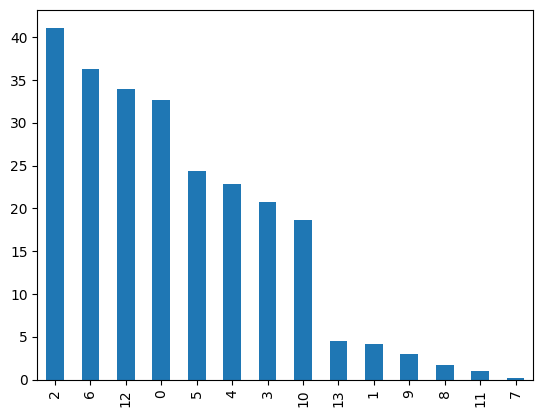

In [19]:
import matplotlib.pyplot as plt
df['即期買入'].plot(kind='bar')
plt.show()

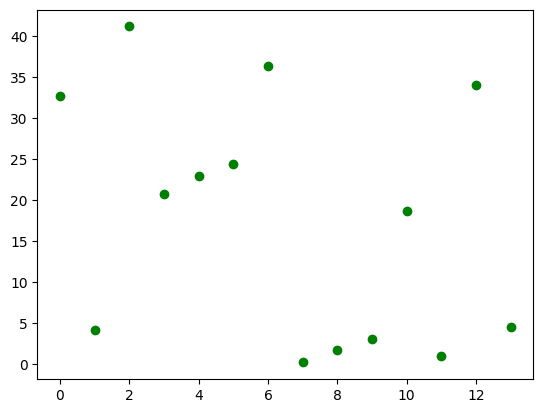

In [21]:
import matplotlib.pyplot as plt
# 1.製作figure
fig = plt.figure()
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.plot(df['即期買入'],'go')
plt.show()

In [22]:
df['幣別'].apply(lambda x: x.split()[-1])

2     (GBP)
6     (CHF)
12    (EUR)
0     (USD)
5     (SGD)
4     (CAD)
3     (AUD)
10    (NZD)
13    (CNY)
1     (HKD)
9     (SEK)
8     (ZAR)
11    (THB)
7     (JPY)
Name: 幣別, dtype: object

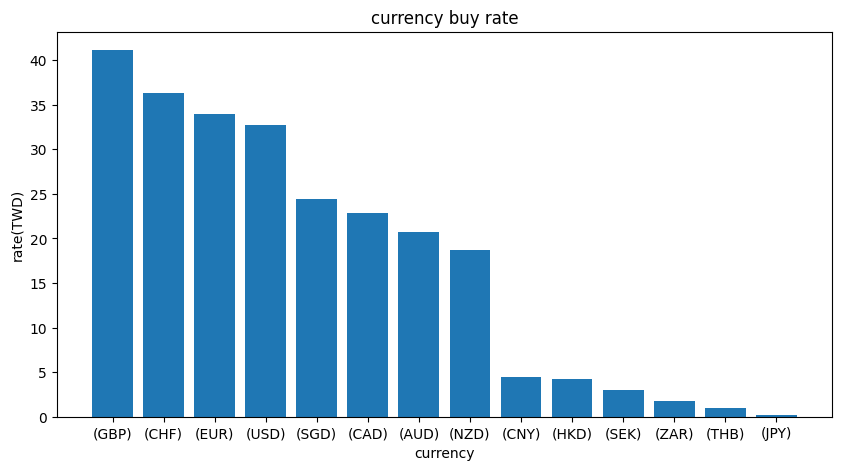

In [25]:
import matplotlib.pyplot as plt
# 1.製作figure
fig = plt.figure(figsize=(10, 5))
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.bar(df['幣別'].apply(lambda x: x.split()[-1]),df['即期買入'])
ax_1.set_title('currency buy rate')
ax_1.set_xlabel('currency')
ax_1.set_ylabel('rate(TWD)')
plt.show()